# MNIST using Tensorflow and keras

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [5]:
mnist=tf.keras.datasets.mnist

In [6]:
(x_train,y_train),(x_test,y_test)= mnist.load_data()
x_train= tf.keras.utils.normalize(x_train, axis=1)
x_test= tf.keras.utils.normalize(x_test,axis=1)

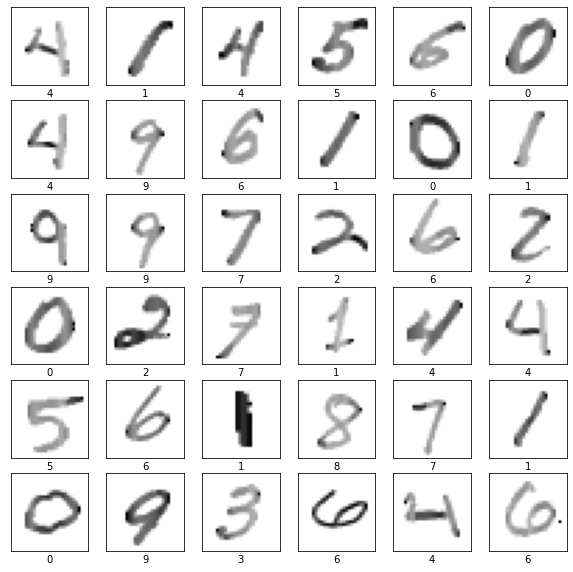

In [7]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(x_train[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(y_train[image_ind])

In [8]:
#Building fully connected neural network Model
def build_model():
    model= tf.keras.Sequential([
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation= tf.nn.relu),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation= tf.nn.softmax),
    ])
    return model
model= build_model()

In [9]:
#defining loss function, optimizer, metrics
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
#train the model
model.fit(x_train, y_train, batch_size= 64, epochs= 3);

Epoch 1/3
938/938 [==============================] - 3s 2ms/step - loss: 0.6663 - accuracy: 0.8229
Epoch 2/3
938/938 [==============================] - 2s 2ms/step - loss: 0.2090 - accuracy: 0.9389
Epoch 3/3
938/938 [==============================] - 2s 2ms/step - loss: 0.1546 - accuracy: 0.9561


In [11]:
#evaluating loss and accuracy on testing data
test_loss, test_accuracy= model.evaluate(x_test,y_test)
print("Test Accuracy= ",test_accuracy)

313/313 [==============================] - 0s 958us/step - loss: 0.1223 - accuracy: 0.9623
Test Accuracy=  0.9623000025749207


# MNIST using CNN

In [12]:
print(x_train[0].shape)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test= x_test.reshape(-1,28,28,1)
print(x_train[0].shape)

(28, 28)
(28, 28, 1)


In [19]:
#defining the cnn model
def build_cnn_model():
    cnn_model= tf.keras.Sequential([
        tf.keras.layers.Conv2D(filters= 24, kernel_size= (3,3), activation= tf.nn.relu),
        tf.keras.layers.MaxPool2D(pool_size= (2,2)),
        tf.keras.layers.Conv2D(filters= 36, kernel_size= (3,3), activation= tf.nn.relu),
        tf.keras.layers.MaxPool2D(pool_size= (2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation= tf.nn.relu),
        tf.keras.layers.Dense(10, activation= tf.nn.softmax)])
    return cnn_model
cnn_model= build_cnn_model()

In [20]:
#training the model
cnn_model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate= 1e-3),
                  loss= 'sparse_categorical_crossentropy',
                  metrics= ['accuracy'])

In [21]:
cnn_model.fit(x_train, y_train, batch_size= 64, epochs= 3)

Epoch 1/3
938/938 [==============================] - 18s 19ms/step - loss: 0.4623 - accuracy: 0.8642
Epoch 2/3
938/938 [==============================] - 18s 19ms/step - loss: 0.0658 - accuracy: 0.9801
Epoch 3/3
938/938 [==============================] - 19s 20ms/step - loss: 0.0445 - accuracy: 0.9860


In [22]:
cnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 24)        240       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 24)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 36)        7812      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 36)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 900)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               115328    
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

In [23]:
test_loss, test_accuracy= cnn_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0386 - accuracy: 0.9876


In [24]:
predictions= cnn_model.predict(x_test)

In [25]:
predictions[0]

array([9.9000786e-08, 1.4436594e-06, 2.9262947e-05, 1.2904943e-04,
       1.3852654e-10, 7.0489200e-08, 2.1302259e-13, 9.9983740e-01,
       1.4567912e-06, 1.1896823e-06], dtype=float32)

In [26]:
prediction= np.argmax(predictions[0])

In [27]:
print(prediction)

7


Label of this digit is: 7


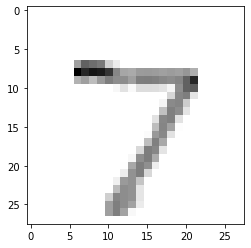

In [28]:
print("Label of this digit is:", y_test[0])
plt.imshow(x_test[0,:,:,0], cmap=plt.cm.binary);